# **IMPUTACION DE DATOS**

In [71]:
import pandas as pd
nombre_archivo='Customer.csv'
datos = pd.read_csv(nombre_archivo)
datos
#SE OBSERVA QUE TENEMOS DATOS DE TIPO CONTINUA Y CATEGORICA

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,UnAño,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,UnAño,No,DebitoEnCuenta,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Si,Si,24,Si,Si,DSL,Si,No,Si,Si,Si,Si,UnAño,Si,ChequePapel,84.80,No
7039,0,Si,Si,72,Si,Si,FibraOptica,No,Si,Si,No,Si,Si,UnAño,Si,TarjetaDeCredito,103.20,No
7040,0,Si,Si,11,No,SinServicioTelefonico,DSL,Si,No,No,No,No,No,Mensual,Si,ChequeDigital,29.60,No
7041,1,Si,No,4,Si,Si,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequePapel,74.40,Si


In [72]:
print(datos.isnull().sum())
#como no tenemos valores null no es necesario tecnicas de imputacion de datos

Mayor60Años                0
Conyuge                    0
Dependientes               0
MesesDeContrato            0
TelefonoFijo               0
VariasLineasTelefonicas    0
ServicioDeInternet         0
SeguridadOnline            0
BackupOnline               0
SeguroEnDispositivo        0
SoporteTecnico             0
TVCable                    0
Streaming                  0
TipoDeContrato             0
PagoOnline                 0
FormaDePago                0
CuentaMensual              0
Churn                      0
dtype: int64


# **LABEL ENCODER**

In [73]:
# label encoder para datos categoricos de 2 tipos
diccionario = {'Si': 1,
                'No': 0}

datosmodificados = datos[['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn']].replace(diccionario)
datosmodificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [74]:
#Transformación con get_dummies crea colummnas extras para volver una data categorical en dual

dummie_datos = pd.get_dummies(datos.drop(['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn'],
                axis=1))
dummie_datos.head()



,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,0,1,29.85,0,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,45,42.30,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [75]:
#Unión de los datos transformados con los que ya teníamos
datos_final = pd.concat([datosmodificados, dummie_datos], axis=1)
datos_final


,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,1,...,0,1,0,0,0,1,0,1,0,0
7039,1,1,1,1,0,0,72,103.20,0,1,...,0,1,0,0,0,1,0,0,0,1
7040,1,1,0,1,0,0,11,29.60,0,0,...,1,0,0,0,1,0,1,0,0,0
7041,1,0,1,1,1,1,4,74.40,0,1,...,1,0,0,0,1,0,0,1,0,0


# **BALANCEO DE DATOS**

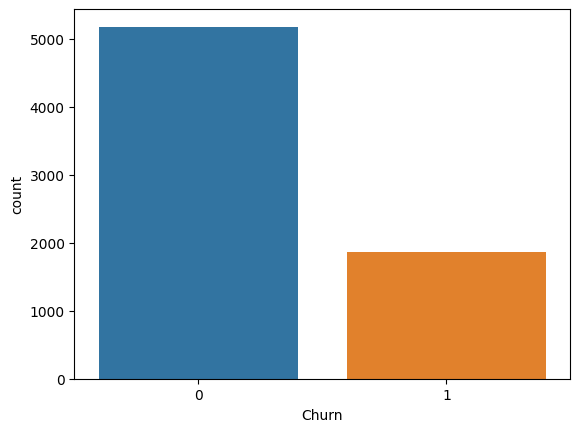

In [76]:
#variable target(churn) está desbalanceada, si se empienza a entrenar de esta manera
#el resultado va a tender a 0
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=datos_final)

In [77]:
datos_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [78]:
#para arreglar esto se crea variables ficticias
#biblioteca para balancear los datos utilizando over_sampling
#el over sampling crea valores ficticios sin cambiar el resultado
from imblearn.over_sampling import SMOTE
#dividiendo los datos en características y target
X = datos_final.drop('Churn', axis = 1) #variables
y = datos_final['Churn'] #target

In [79]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)
#unión de los datos balanceados
datos_final = pd.concat([X, y], axis=1)

In [80]:
#unión de los datos
datos_final

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,...,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.850000,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,34,56.950000,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,1,0,2,53.850000,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,45,42.300000,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,1,0,2,70.700000,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,1,1,0,5,80.921075,0,1,0,...,0,0,0,1,0,1,0,0,0,1
10344,0,0,1,1,0,3,74.347278,0,1,0,...,0,0,0,1,0,0,0,0,1,1
10345,0,0,1,1,0,18,70.164647,1,0,0,...,0,0,0,1,0,1,0,0,0,1
10346,0,0,1,0,0,30,93.024726,0,1,0,...,0,0,0,1,0,0,0,0,1,1


0    5174
1    5174
Name: Churn, dtype: int64

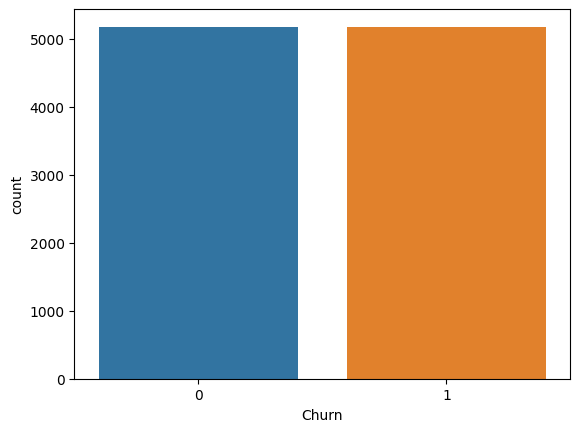

In [81]:
#balanceamiento
ax = sns.countplot(x='Churn', data=datos_final)
datos_final.Churn.value_counts()

# **NORMALIZACION**

In [82]:
#dividiendo los datos en características y target
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [83]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [84]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ..., -0.47912706,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ...,  2.08712905,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ...,  2.08712905,
        -0.4360152 , -0.42576817],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 , -0.42576817],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 ,  2.34869598],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.47912706,
        -0.4360152 ,  2.34869598]])

## **DIVISION DE DATA**

In [85]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

# **MODELO KNN**

In [87]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean')

In [89]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [90]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)
prediccion_knn

array([1, 0, 0, ..., 0, 1, 1])

# **MODELO NAIVE BAYES**

In [91]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB
import numpy as np

In [92]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.4461759755508453

In [93]:
X_train_binarizado = np.where(X_train > mediana, 1, 0)
X_train_binarizado

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [94]:
y_train

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [95]:
#creamos el modelo
bnb = BernoulliNB()

In [96]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [97]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [98]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [99]:
prediccion_BNb

array([1, 0, 0, ..., 1, 1, 1])

# **MODELO ARBOL DE DESICION**

In [100]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [101]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [102]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [103]:
prediccion_ArbolDecision

array([0, 0, 0, ..., 1, 1, 1])

# **MODELO RANDOM FOREST**

In [104]:
from sklearn.ensemble import RandomForestClassifier
# Inicializando el modelo Random Forest
rf_model = RandomForestClassifier(criterion='entropy', random_state=42)

In [105]:
# Entrenando el modelo con datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [106]:
# Realizando predicciones en datos de prueba
prediccion_RandomForest = rf_model.predict(X_test)

In [107]:
prediccion_RandomForest

array([1, 0, 0, ..., 1, 1, 1])

# **VALIDACION DE MODELOS**

In [108]:
from sklearn.metrics import confusion_matrix

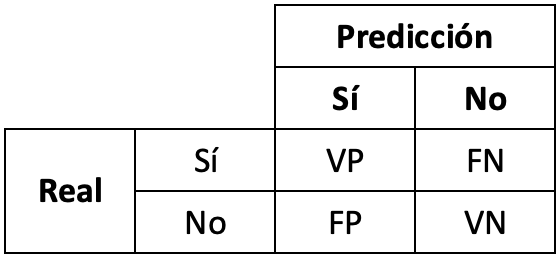

In [109]:
print('KNN:')
print(confusion_matrix(y_test, prediccion_knn))
print('Naive Bayes:')
print(confusion_matrix(y_test, prediccion_BNb))
print('Árbol de Decisión:')
print(confusion_matrix(y_test, prediccion_ArbolDecision))
print('Random Forest:')
print(confusion_matrix(y_test, prediccion_RandomForest))

KNN:
[[1242  327]
 [ 247 1289]]
Naive Bayes:
[[1048  521]
 [ 241 1295]]
Árbol de Decisión:
[[1242  327]
 [ 271 1265]]
Random Forest:
[[1333  236]
 [ 245 1291]]


**Accuracy (exactitud)**

In [110]:
from sklearn.metrics import accuracy_score
print('KNN: ',(accuracy_score(y_test, prediccion_knn)))
print('Naive Bayes: ',(accuracy_score(y_test, prediccion_BNb)))
print('Arbol de desicion: ',(accuracy_score(y_test, prediccion_ArbolDecision)))
print('Random Forest: ',(accuracy_score(y_test, prediccion_RandomForest)))

KNN:  0.8151368760064412
Naive Bayes:  0.7545893719806763
Arbol de desicion:  0.8074074074074075
Random Forest:  0.8450885668276973


**Precisión**

In [111]:
from sklearn.metrics import precision_score
print('KNN: ',(precision_score(y_test, prediccion_knn)))
print('Naive Bayes: ',(precision_score(y_test, prediccion_BNb)))
print('Arbol de desicion: ',(precision_score(y_test, prediccion_ArbolDecision)))
print('Random Forest: ',(precision_score(y_test, prediccion_RandomForest)))

KNN:  0.7976485148514851
Naive Bayes:  0.7131057268722467
Arbol de desicion:  0.7945979899497487
Random Forest:  0.8454485920104781


**Recall(Sensibilidad)**

In [112]:
from sklearn.metrics import recall_score
print('KNN: ',(recall_score(y_test, prediccion_knn)))
print('Naive Bayes: ',(recall_score(y_test, prediccion_BNb)))
print('Arbol de desicion: ',(recall_score(y_test, prediccion_ArbolDecision)))
print('Random Forest: ',(recall_score(y_test, prediccion_RandomForest)))

KNN:  0.8391927083333334
Naive Bayes:  0.8430989583333334
Arbol de desicion:  0.8235677083333334
Random Forest:  0.8404947916666666


# **Conclusion**

In [113]:
#EL MEJOR MODELO ES RANDOM FOREST, eS EL QUE SE COIMPORTA MEJOR EN TODAS LAS METRICAS
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))
print('Modelo Random Forest: ', precision_score(y_test, prediccion_RandomForest))

Modelo KNN:  0.7976485148514851
Modelo Bernoulli de Naive Bayes:  0.7131057268722467
Modelo Arbol de Decisión:  0.7945979899497487
Modelo Random Forest:  0.8454485920104781


# **EJECUCION** (probando modelos con un caso)



Para realizar la prueba de prediccion de nuestros modelos de entrenamiento, se realizo la creacion de un usuario, este ususario no esta en nuestra dataset por lo que estamos probando la prediccion de los diferentes modelos en un caso real:

las caracterizticas de este nuevo usuario serian las siguientes

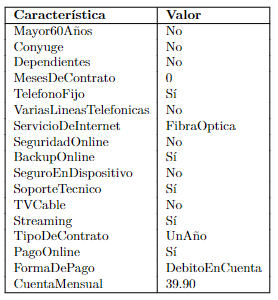

In [114]:
Xpablito = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [115]:
Xpablito_normalizado = norm.transform(pd.DataFrame(Xpablito, columns = X.columns))
Xpablito_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.83366906, -0.31386908,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.51721942,
        -0.44617598, -0.95834643, -0.63536575,  2.24126814,  1.04285807,
         1.5573554 , -0.44617598, -1.13662476,  1.90742727, -0.44617598,
         1.18690873, -0.77707385, -0.44617598, -0.83117367, -0.78976268,
         2.24126814, -0.44648735, -1.35522058,  2.38155929, -0.76702973,
        -0.47912706, -0.4360152 ,  2.34869598]])

## con knn

In [116]:
prediccion_pablito = knn.predict(Xpablito_normalizado)
diccionario = {'CHURN (se retira de la compañia)': 1, 'NO CHURN (Se mantiene en la compañia)': 0}
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_pablito[0]), None)
print(f"KNN - El ususario clasifica como : {clave_encontrada}")

KNN - El ususario clasifica como : NO CHURN (Se mantiene en la compañia)


## Con Naive Bayes

In [117]:
prediccion_pablitobnb = bnb.predict(Xpablito_normalizado)
diccionario = {'CHURN (se retira de la compañia)': 1, 'NO CHURN (Se mantiene en la compañia)': 0}
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_pablitobnb[0]), None)
print(f"NB - El ususario clasifica como : {clave_encontrada}")

NB - El ususario clasifica como : NO CHURN (Se mantiene en la compañia)


## Con Arbol de Deciciones

In [118]:
prediccion_pablitodtc = dtc.predict(Xpablito_normalizado)
diccionario = {'CHURN (se retira de la compañia)': 1, 'NO CHURN (Se mantiene en la compañia)': 0}
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_pablitodtc[0]), None)
print(f"AD - El ususario clasifica como : {clave_encontrada}")

AD - El ususario clasifica como : NO CHURN (Se mantiene en la compañia)


## Con Random Forest

In [119]:
prediccion_pablito_rf = rf_model.predict(Xpablito_normalizado)
diccionario = {'CHURN (se retira de la compañia)': 1, 'NO CHURN (Se mantiene en la compañia)': 0}
clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_pablito_rf[0]), None)
print(f"RF - El ususario clasifica como : {clave_encontrada}")

RF - El ususario clasifica como : NO CHURN (Se mantiene en la compañia)


# **graficas**

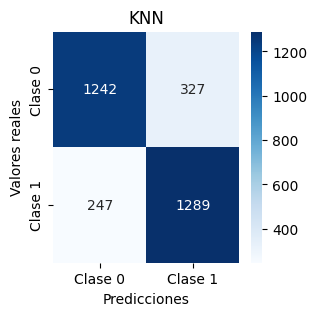

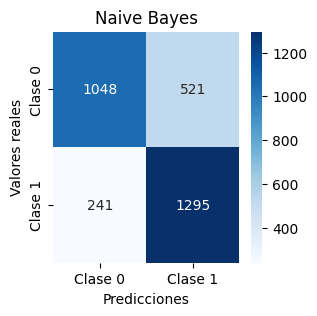

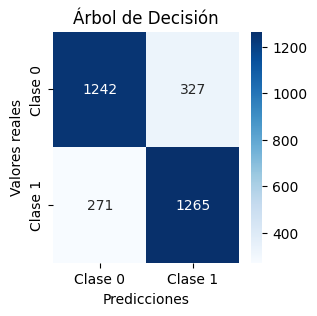

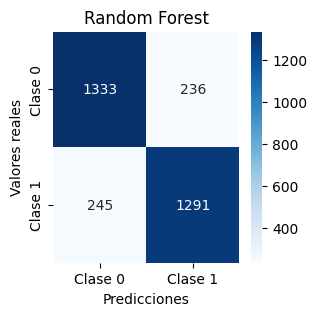

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


class_names = ["Clase 0", "Clase 1"]

def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(3, 3))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.show()

matrices = [confusion_matrix(y_test, prediccion_knn),
            confusion_matrix(y_test, prediccion_BNb),
            confusion_matrix(y_test, prediccion_ArbolDecision),
            confusion_matrix(y_test, prediccion_RandomForest)]

modelos = ['KNN', 'Naive Bayes', 'Árbol de Decisión', 'Random Forest']

for i in range(len(matrices)):
    plot_confusion_matrix(matrices[i], modelos[i])


<ipython-input-121-107c87826a03>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()


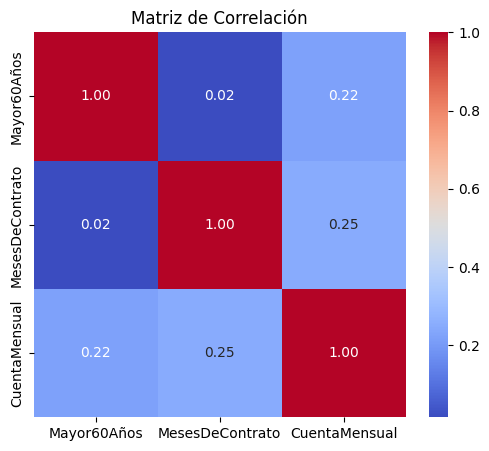

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
correlation_matrix = datos.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

